### Getting the Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Datasets/glass.csv')
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [7]:
df.shape

(214, 11)

In [8]:
df.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

### Finding the optimal value of K

In [9]:
from sklearn.cluster import KMeans

In [10]:
from scipy.spatial.distance import cdist

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [12]:
x = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y = df[['Type']]

In [13]:
distortions = []
inertias = []
silhouette = []
K = range(2, 15)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    
    silhouette.append(silhouette_score(x, kmeanModel.labels_))
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
    inertias.append(kmeanModel.inertia_)

In [14]:
inertias

[820.0278544371246,
 589.0314496288756,
 497.9142663101756,
 400.53174126774235,
 336.21314302964504,
 292.26284565908503,
 266.72903408820025,
 245.8830138716883,
 229.02785087849884,
 211.7935753312249,
 198.79587321699685,
 182.44118040779736,
 168.36149409762083]

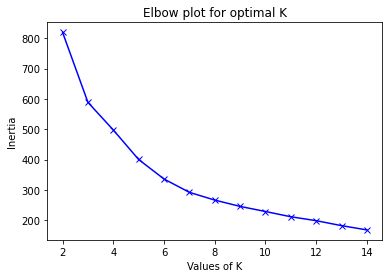

In [15]:
#Plotting inertia for various values of x

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow plot for optimal K')
plt.show()

**The optimal number of clusters (k) for this dataset is 7, as according to the graph, inertia is seen to decrease in a linear fashion after 7.**

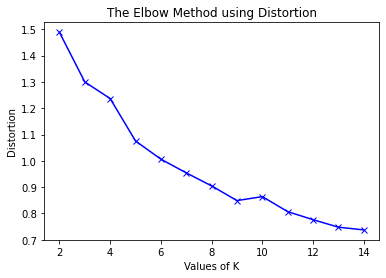

In [16]:
#Plotting distortion for various values of x

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

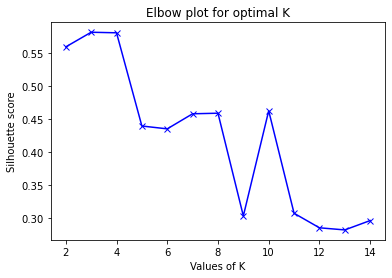

In [17]:
plt.plot(K, silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Elbow plot for optimal K')
plt.show()

**Q] Give the number of points falling into each cluster, after deciding the optimal value of K.**

In [18]:
kmeans = KMeans(n_clusters=7)

In [19]:
kmeans.fit(x)

KMeans(n_clusters=7)

In [20]:
kmeans.fit_predict(x).shape

(214,)

In [21]:
kmeans.labels_

array([4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 4,
       1, 4, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 0, 0, 0, 5, 5,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 5, 5, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 4, 6, 5, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5,
       4, 4, 4, 4, 2, 2, 5, 5, 2, 6, 6, 1, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
for i in range(0,7):
    print("No. of points in cluster ", i, ": ", len(kmeans.labels_[kmeans.labels_== i]))

No. of points in cluster  0 :  7
No. of points in cluster  1 :  124
No. of points in cluster  2 :  26
No. of points in cluster  3 :  2
No. of points in cluster  4 :  35
No. of points in cluster  5 :  17
No. of points in cluster  6 :  3


**Q] Present the comparative study of original classes and predicted clusters using appropriate plot.**

Text(0, 0.5, 'Na')

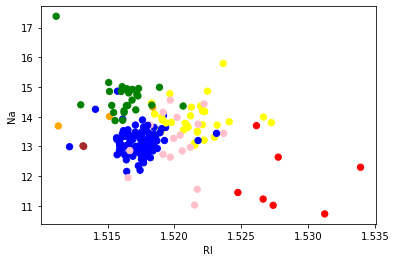

In [23]:
# Plot of original classes

colors = np.array(['red', 'blue', 'green', 'brown', 'yellow', 'pink', 'orange'])

plt.scatter(df['RI'], df['Na'], c=colors[kmeans.labels_], s=40)
plt.xlabel('RI')
plt.ylabel('Na')

In [24]:
# Feature Scaling

from sklearn.decomposition import PCA
pca = PCA(2)
df_pca = pca.fit_transform(x)
kmeans = KMeans(n_clusters= 7)
label = kmeans.fit_predict(df)
label

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0, 0.5, 'Second Principal Component')

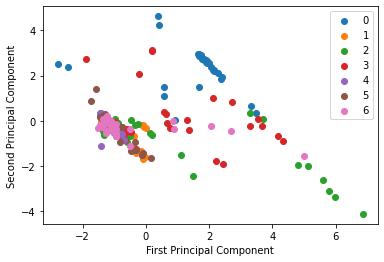

In [25]:
# Plot of predicted clusters after PCA

for i in range(0,7):
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

**Q] Evaluate the model**

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
import sklearn.metrics as sm

In [28]:
type_arr = df['Type'].to_numpy()
type_arr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int64)

In [29]:
sm.accuracy_score(kmeans.labels_, type_arr) 

0.3364485981308411

In [30]:
sm.confusion_matrix(kmeans.labels_, type_arr)

array([[ 0,  0,  0,  0,  0,  0,  3, 29],
       [ 0, 31,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 11,  0, 13,  6,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0],
       [ 0,  9, 22,  0,  0,  0,  0,  0],
       [ 0,  0, 24,  6,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

**Q] Predict the Type of Glass for the following datapoints:**

1)  k= 1.0, Mg= 2, and others are not available.

2) Na= 10.5, Mg= 4.9, Al= 0.78, Si= 65, K= 1.1, Ca= 8.99, Ba= .3, and Fe= .5.

In [31]:
kmeans.predict([[0,0,0,10.5,4.9,0.78,65,1.1,8.99,0.3,0.5]])

array([4])